<a href="https://colab.research.google.com/github/zmasoomi/CBAM-tensorflow/blob/master/An%20airline%20route%20map%20graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithms - Graphs

## Exercise 1: Graph Making

### 1.1: Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![ex2](../assets/exercise2.png)

In [ ]:
import networkx as nx


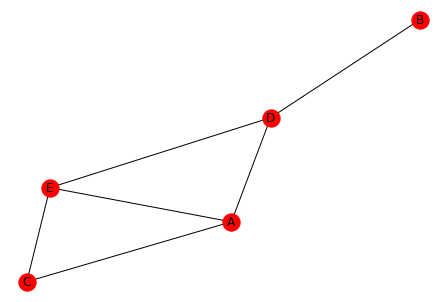

In [ ]:
# exercise 1.1
G = nx.Graph([('A', 'C'), ('A', 'E'), ('A', 'D'), ('D', 'E'), ('D', 'B'), ('E', 'C')])
nx.draw(G, node_color='red', with_labels=True)

### 1.2: computing node degrees of graphs

For the graph made by your function in the previous exercise, calculate the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_degrees` which takes a networkx graph object as input, and returns a `dict` with the degrees of all the nodes in the graph.

**NOTE:** You cannot use the diameter or degree method from networkx directly to compute the degrees. 

```
compute_degrees(G) -> {
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}
```

In [ ]:
def compute_degrees(graph):
    """
    computing node degrees of graphs
    """
    degree = {}
    for node in graph.nodes: #choosing from given nodes in the graph
        i = 0  # counter
        for node2 in graph.nodes:
            if (node, node2) in graph.edges:  #having connection between two nodes as a degree
                i += 1
        degree['degree_'+node] = i
    return degree


G = nx.Graph([('A', 'C'), ('A', 'E'), ('A', 'D'), ('D', 'E'), ('D', 'B'), ('E', 'C')])


compute_degrees(G)

{'degree_A': 3, 'degree_C': 2, 'degree_E': 3, 'degree_D': 3, 'degree_B': 1}

### 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


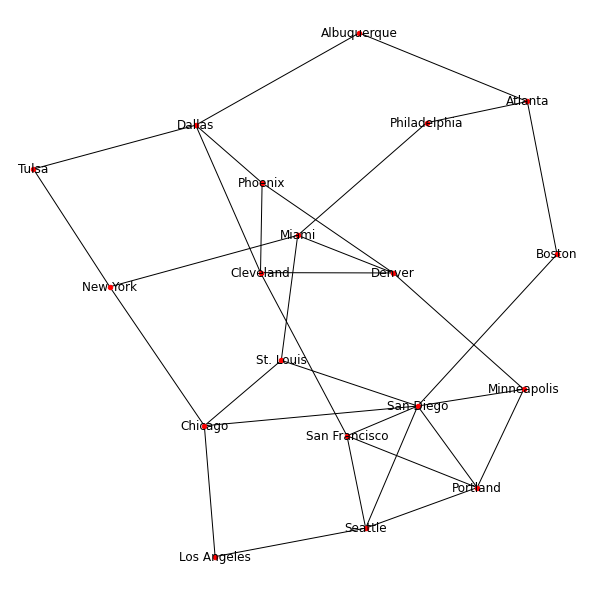

In [ ]:
# exercise 1.3
Rout = nx.Graph([('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'),
                      ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'),
                      ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'),
                      ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'),
                      ('Miami', 'Denver'),('Dallas', 'Albuquerque'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'),  ('Philadelphia', 'Atlanta'), 
                      ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'),
                      ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')])
import matplotlib.pyplot as plt
plt.figure(3,figsize=(8,8)) 

nx.draw(Rout, node_color='red', node_size=20, node_shape='o', with_labels=True)


  
    
    


In [ ]:
# The Diameter of any graph is the longest shortest dustanyace between two nodes.
# so for this question it is just enough to find diameter by networkx library:

print(f'the maximum hops taken in one single trip is:{nx.diameter(Rout)}')


the maximum hops taken in one single trip is:5


In [ ]:
def optimal_city(graph):
    """
    returns the city would be the most optimal place,to minimize the number of hops
    """ 
    best_city = 'best' 
    mean_path = 19  #toevaluate the average to be calculated later.
    path = []
    for origin in Rout.nodes:  # iterate on coties as origin
        for destination in Rout.nodes: # iterate on cities as destination from origin to find the shortest distance
            if origin!=destination: # there is no vertice from origin to origin
                distance = nx.shortest_path_length(graph, origin, destination) # the shortest way to reach destination
                path.append(distance)
        average = np.mean(path)#to calculate aversge on all distance between each pairs selected in previous loop
        #print(origin, average)
        if average<mean_path: #to bring in front the minimum average to be calculeted till this point in iteration
            mean_path = average
            best_city = origin
    return f' the optimal city is {best_city} with average distance :{mean_path}'

optimal_city(Rout)    
    

' the optimal city is San Diego with average distance :2.111111111111111'